# Titanic - Machine Learning from Disaster
This is my first submission in Kaggle so if you find any mistakes, corrections, or suggestions, feel free to mention them.

## Initial Setup

### Import Statements

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Data Visualization 

### Import the Datasets

In [2]:
train_data = pd.read_csv("./datasets/train.csv")
test_data = pd.read_csv("./datasets/test.csv")

### Stylistics

In [3]:
%matplotlib inline
plt.style.use("dark_background")
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)

## Data Cleaning

### Files

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./datasets/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

./datasets/test.csv
./datasets/gender_submission.csv
./datasets/train.csv


### Exploring the Dataset

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
print("Number of Rows: {}".format(train_data.shape[0]))
print("Number of Colums: {}".format(train_data.shape[1]))
print("Column Names: {}".format(train_data.columns.values))

Number of Rows: 891
Number of Colums: 12
Column Names: ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Some of the insights that we can get from these cells are:
1. `PassengerId` gives a natural ordering to the dataset.
2. We have 891 rows and 12 columns. `Name`, `Ticket` and `Cabin` are no important to us and should be dropped.
3. The Columns have correct dtype except `Sex` that can be turned into a boolean number.
4. We have 7 Numeric Columns and 5 Strings
4. We have missing values.

### Remove Unnecessary Columns 

#### Training Data

In [9]:
print("Number of Colums (BEFORE): {}".format(train_data.shape[1]))
train_data = train_data.drop(["Name", "Ticket", "Cabin"], axis=1)
print("Number of Colums (AFTER): {}".format(train_data.shape[1]))

Number of Colums (BEFORE): 12
Number of Colums (AFTER): 9


We can confirm that we have removed the columns by printing how many columns we have.

#### Test Data

In [10]:
print("Number of Colums (BEFORE): {}".format(test_data.shape[1]))
test_data = test_data.drop(["Name", "Ticket", "Cabin"], axis=1)
print("Number of Colums (AFTER): {}".format(test_data.shape[1]))

Number of Colums (BEFORE): 11
Number of Colums (AFTER): 8


### Missing Values

#### Training Data

In [11]:
def missing_val(data="train_data"):
    if data == "train_data":
        for col in train_data.columns:
            print("{}: {}".format(col, train_data[col].isnull().sum()))
    else:
        for col in test_data.columns:
            print("{}: {}".format(col, test_data[col].isnull().sum()))

missing_val()

PassengerId: 0
Survived: 0
Pclass: 0
Sex: 0
Age: 177
SibSp: 0
Parch: 0
Fare: 0
Embarked: 2


We can see that `Age` and `Embarked` has the missing values. Let's deal first with `Age`.

#### Test Data

In [12]:
missing_val("test_data")

PassengerId: 0
Pclass: 0
Sex: 0
Age: 86
SibSp: 0
Parch: 0
Fare: 1
Embarked: 0


Just like `train_data`, `test_data` also has some missing data on age.

#### Filing `Age` Column with Mean Values

Since `Age` has some significant values that are missing and we have no way to identify the  age of the passenger based on the columns presented, one solution that I can think of is fill this with the mean values of the `Age` column. Let's do just that.

##### Training Data

In [13]:
mean_age = train_data["Age"].mean()
train_data["Age"].fillna(mean_age, inplace=True)

In [14]:
missing_val()

PassengerId: 0
Survived: 0
Pclass: 0
Sex: 0
Age: 0
SibSp: 0
Parch: 0
Fare: 0
Embarked: 2


As we can see, the `Age` column does not have any more missing values. Now let's do the same with the `test_data`.

##### Test Data

In [15]:
mean_age = test_data["Age"].mean()
test_data["Age"].fillna(mean_age, inplace=True)

In [16]:
missing_val("test_data")

PassengerId: 0
Pclass: 0
Sex: 0
Age: 0
SibSp: 0
Parch: 0
Fare: 1
Embarked: 0


As we can see, there are no mising values in the `Age` Column.

#### Filing `Fare` Column with Mean Values

In [17]:
mean_fare = test_data["Fare"].mean()
test_data["Fare"].fillna(mean_fare, inplace=True)

#### Removing  Missing Values

##### Training Data

Since `Embarked` is a column that tells from which port did the person come in to Titanic and there is no way we can tell that based on the information at hand, we will just removed it since we are only removing an insignificant amount of rows.

In [18]:
print("BEFORE Row Deletion: {}\n".format(train_data.shape[0]))
train_data.dropna(inplace=True)
missing_val()
print("\nAFTER Row Deletion: {}".format(train_data.shape[0]))

BEFORE Row Deletion: 891

PassengerId: 0
Survived: 0
Pclass: 0
Sex: 0
Age: 0
SibSp: 0
Parch: 0
Fare: 0
Embarked: 0

AFTER Row Deletion: 889


### Removing  Outliers
In order for our dataset to be prepared to be analyzed by our chosen model, we need to remove outliers that will draw our conclusion far away from the truth. To do this, we will consider a value an outlier if it falls over 3 standard deviation away from the mean.

#### Numeric Columns

In [19]:
features = ["Fare", "Age", "SibSp", "Parch"] # Columns we are interested in
before_removal = train_data.shape[0]
for feature in features:
    min_ = train_data[feature].mean() - (3 * train_data[feature].std())
    max_ = train_data[feature].mean() + (3 * train_data[feature].std())
    
    train_data = train_data[train_data[feature] >= min_]
    train_data = train_data[train_data[feature] <= max_]
    print("Number of Observations: {} -> {}\n".format(feature, train_data[feature].shape))
    
print("Number of Observation Removed: {}".format(before_removal - train_data.shape[0]))

Number of Observations: Fare -> (869,)

Number of Observations: Age -> (862,)

Number of Observations: SibSp -> (832,)

Number of Observations: Parch -> (818,)

Number of Observation Removed: 71


#### Text Columns

##### Training Data

In [20]:
features = ["Sex", "Embarked"]

for feature in features:
    count_ = train_data[feature].value_counts()
    
    print(feature)
    print(count_, "\n")

Sex
male      539
female    279
Name: Sex, dtype: int64 

Embarked
S    594
C    153
Q     71
Name: Embarked, dtype: int64 



##### Test Data

In [21]:
features = ["Sex", "Embarked"]

for feature in features:
    count_ = test_data[feature].value_counts()
    
    print(feature)
    print(count_, "\n")

Sex
male      266
female    152
Name: Sex, dtype: int64 

Embarked
S    270
C    102
Q     46
Name: Embarked, dtype: int64 



None of the classes for any of the features are considered to be outliers as they all represent over 5% of the entire dataset.

## Data Preprocessing
Since we have String columns, our Machine Learning model won't be able to process data that are not numbers. A solution might be to use `LabelEncoder()` from scikit-learn to transform the text data into numeric data.

### Train Data

In [22]:
X = train_data.drop("Survived", axis=1)
y = train_data["Survived"].values

#### OneHotEncoding()

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), ["Sex", "Embarked"])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [24]:
X = pd.DataFrame(X)

In [25]:
X[5] = X[5].astype(int)

#### LabelEncoder()

In [26]:
# from sklearn.preprocessing import LabelEncoder
# enc = LabelEncoder()

# features = ["Sex", "Embarked"]

# for feature in features:
#     X[feature] = enc.fit_transform(X[feature])
# X

#### Dummy Variables

In [27]:
# X = pd.get_dummies(X, columns=["Sex", "Embarked"])
# X = X.values

### Test Data

#### OneHotEncoder()

In [28]:
test_data = np.array(ct.fit_transform(test_data))

In [29]:
test_data = pd.DataFrame(test_data)
test_data = test_data.astype(int)

#### LabelEncoder()

In [30]:
# from sklearn.preprocessing import LabelEncoder
# enc = LabelEncoder()
# for feature in features:
#     test_data[feature] = enc.fit_transform(test_data[feature])

#### Dummy Variable

In [31]:
# test_data = pd.get_dummies(test_data, columns=["Sex", "Embarked"])

## Machine Learning Model
Now we are ready to feed our data to the model we choose to predict whether a person will survive or not depending on the labeled data that we fed in to our model.

### Splitting the Training Dataset into Dependent and Independent Variable
Since the answer that we want to address is whether the person is going to survive or not (`Survived`), this will be our dependent variable and the rest of te features will be the independent variable.

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y) 

### Fitting the Training Data to Model

#### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)
acc_logreg = logreg.score(X_train, y_train)*100
acc_test_logreg = logreg.score(X_test, y_test)*100
print("Accuracy on Training Set: {:.2f}".format(acc_logreg))
print("Accuracy on Test Set: {:.2f}".format(acc_test_logreg))

Accuracy on Training Set: 79.45
Accuracy on Test Set: 79.51


/home/prince/Github/Kaggle Competitions/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
acc_tree = tree.score(X_train, y_train)*100
acc_test_tree = tree.score(X_test, y_test)*100


print("Accuracy on Training Set: {:.2f}".format(acc_tree))
print("Accuracy on Test Set: {:.2f}".format(acc_test_tree))

Accuracy on Training Set: 84.83
Accuracy on Test Set: 78.05


#### Polynomial Regression

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X_train)
reg = LinearRegression()
_ = reg.fit(X_poly, y_train)

acc_poly = reg.score(X_poly, y_train)*100
# acc_test_poly = reg.score(X_train, poly_reg.transform(X_test))*100

print("Accuracy on Training Set: {:.2f}".format(acc_poly))
# print("Accuracy on Training Set: {:.2f}".format(acc_test_poly))

Accuracy on Training Set: 81.43


#### Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=200, max_depth=4, max_features=6, n_jobs=-1, max_leaf_nodes=5).fit(X_train, y_train)

acc_forest = forest.score(X_train, y_train)*100
acc_test_forest = forest.score(X_test, y_test)*100

print("Accuracy on Training Set: {:.2f}".format(acc_forest))
print("Accuracy on Test Set: {:.2f}".format(acc_test_forest))

Accuracy on Training Set: 81.40
Accuracy on Test Set: 81.95


#### Gradient Boosting Classifier

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

gradient = GradientBoostingClassifier(learning_rate=0.01).fit(X_train, y_train)

acc_gradient = gradient.score(X_train, y_train)*100
acc_test_gradient = gradient.score(X_test, y_test)*100

print("Accuracy on Training Set: {:.2f}".format(acc_gradient))
print("Accuracy on Test Set: {:.2f}".format(acc_test_gradient))

Accuracy on Training Set: 84.18
Accuracy on Test Set: 77.56


#### K-Nearest Neighbors

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)

acc_knn = knn.score(X_train, y_train)*100
acc_test_knn = knn.score(X_test, y_test)*100

print("Accuracy on Training Set: {:.2f}".format(acc_knn))
print("Accuracy on Test Set: {:.2f}".format(acc_test_knn))

Accuracy on Training Set: 71.94
Accuracy on Test Set: 63.90


#### Linear SVC

In [39]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC(C=4).fit(X_train, y_train)

acc_linearSVC = linear_svc.score(X_train, y_train)*100
acc_test_linearSVC = linear_svc.score(X_test, y_test)*100

print("Accuracy on Training Set: {:.2f}".format(acc_linearSVC))
print("Accuracy on Test Set: {:.2f}".format(acc_test_linearSVC))

Accuracy on Training Set: 79.12
Accuracy on Test Set: 80.49


/home/prince/Github/Kaggle Competitions/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


#### Ridge Classifier

In [40]:
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier().fit(X_train, y_train)

acc_ridge = ridge.score(X_train, y_train)*100
acc_test_ridge = ridge.score(X_test, y_test)*100

print("Accuracy on Training Set: {:.2f}".format(acc_ridge))
print("Accuracy on Test Set: {:.2f}".format(acc_test_ridge))

Accuracy on Training Set: 79.45
Accuracy on Test Set: 80.98


#### Support Vector Classifier

In [41]:
from sklearn.svm import SVC
svc = SVC().fit(X_train, y_train)
acc_svc = svc.score(X_train, y_train)*100
acc_test_svc = svc.score(X_test, y_test)*100

print("Accuracy on Training Set: {:.2f}".format(acc_svc))
print("Accuracy on Test Set: {:.2f}".format(acc_test_svc))

Accuracy on Training Set: 67.37
Accuracy on Test Set: 63.41


Since Random Forest has the highest score, we will use this to predict our resulting test_data

### Predictions

#### X_test Predictions

In [42]:
models = pd.DataFrame({
    'Model': ['Support Vector Classifier', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Linear SVC', 'Decision Tree', "Ridge Regression", "Polynomial Regression", "Gradient Boosting Classifier"],
    'Train Score': [acc_svc, acc_knn, acc_logreg, acc_forest, acc_linearSVC, acc_tree, acc_ridge, acc_poly, acc_gradient],
    'Test Score': [acc_test_svc, acc_test_knn, acc_test_logreg, acc_test_forest, acc_test_linearSVC, acc_test_tree, acc_test_ridge, np.nan, acc_test_gradient]
                     })
sorted_models = models.sort_values(by=["Train Score", "Test Score"], ascending=False)

In [43]:
sorted_models

,Model,Train Score,Test Score
5,Decision Tree,84.828711,78.048780
8,Gradient Boosting Classifier,84.176183,77.560976
7,Polynomial Regression,81.432491,NaN
3,Random Forest,81.402936,81.951220
6,Ridge Regression,79.445351,80.975610
2,Logistic Regression,79.445351,79.512195
4,Linear SVC,79.119086,80.487805
1,KNN,71.941272,63.902439
0,Support Vector Classifier,67.373573,63.414634


#### Submission Prediction

In [44]:
predictions = gradient.predict(test_data)

In [45]:
output = pd.DataFrame({'PassengerId': test_data[5], 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


## Visualizing Decision Tree

In [46]:
from sklearn.tree import export_graphviz
feature_names=['Survived', 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']
export_graphviz(tree, out_file="tree.dot", class_names=["Dead", "Alive"], feature_names=X_train.columns, impurity=False, filled=True)

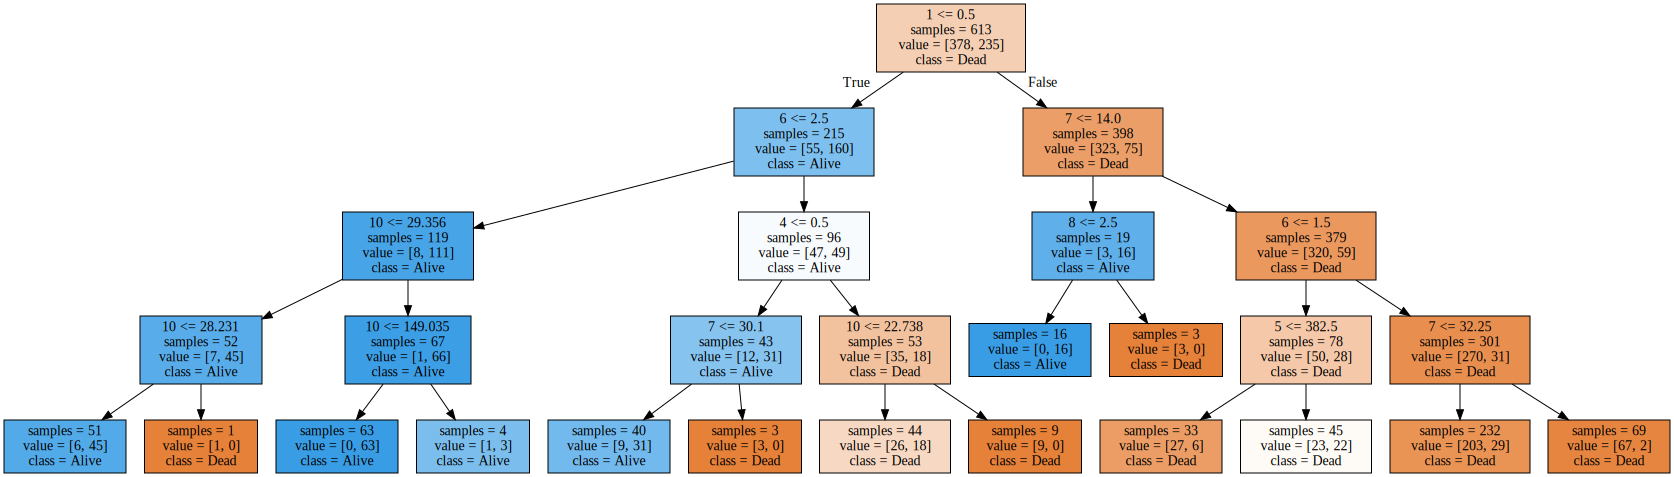

In [47]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [48]:
def plot_feature_importance(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature Names")

In [49]:
# plot_feature_importance(tree)

## Visualizing Random Forest

In [50]:
# plot_feature_importance(forest)

## Visualizing Gradient Boosting

In [51]:
# plot_feature_importance(gradient)